In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import font_manager, rc, cm                ## 폰트를 관리하는 함수와 설정 함수를 사용한다. 

font_path = './font/GmarketSansTTFMedium.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [84]:
data = pd.read_excel('./data/매매_전세_전세가율_평균.xlsx', sheet_name='호당')
data = data.set_index('연도')

sale_data = pd.DataFrame(data['매매가'])
lease_data = pd.DataFrame(data['전세가'])
per_data = pd.DataFrame(data['전세가율'])

sale_data

,매매가
연도,
2016년,26998
2017년,29446
2018년,30771
2019년,32540
2020년,33673
2021년,32721


In [85]:
data = pd.read_csv('./data/깡통전세_사고현황(연도별).csv', encoding = 'CP949')
data = data.set_index('연도')
accident_data = pd.DataFrame(data[data['보증종류'] == '전세보증금반환보증']['건수'])
accident_data

,건수
연도,
2016년,27
2017년,33
2018년,372
2019년,1630
2020년,2408
2021년,2799


In [86]:
df = pd.concat([accident_data, sale_data, lease_data, per_data], join='inner', axis=1)
df

,건수,매매가,전세가,전세가율
연도,,,,
2016년,27,26998,18140,0.671902
2017년,33,29446,19287,0.654996
2018년,372,30771,19907,0.646940
2019년,1630,32540,20191,0.620498
2020년,2408,33673,21920,0.650967
2021년,2799,32721,24799,0.757892


In [87]:
df.corr()

,건수,매매가,전세가,전세가율
건수,1.000000,0.868264,0.902196,0.446706
매매가,0.868264,1.000000,0.756113,0.077193
전세가,0.902196,0.756113,1.000000,0.710755
전세가율,0.446706,0.077193,0.710755,1.000000


C:\Users\Seungjun\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Seungjun\anaconda3\envs\pydatavenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


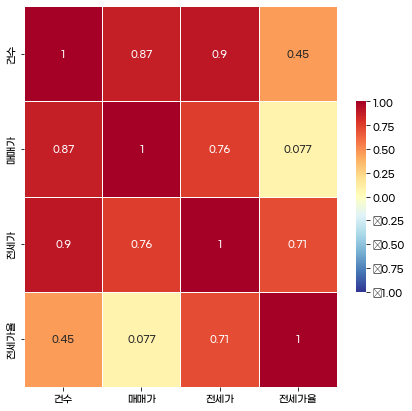

In [88]:
fig, ax = plt.subplots( figsize=(7,7) )

# 히트맵을 그린다
sns.heatmap(df.corr(), 
            cmap = 'RdYlBu_r',
            annot = True,
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()